# Deep Q-Network appliqué à l'environnement CartPole

L'algorithme de Q-learning tabulaire que nous avons vu précédemment n'est plus applicable lorsque l'espace d'état est continu. Dans ce notebook on s'intéresse ici à l'environnement `CartPole` illustré ci-dessous, et dont l'espace d'état contient 4 variables continues.

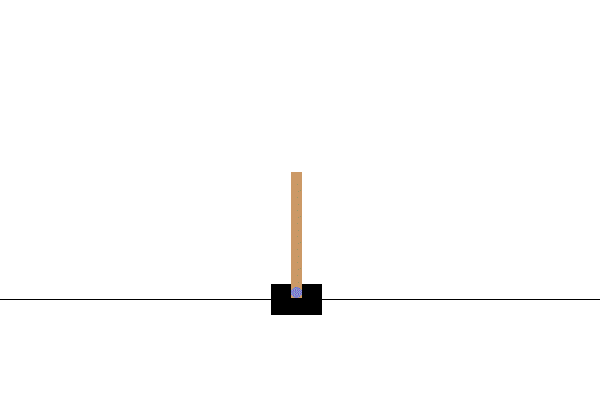

Dans le DQN, au lieu d'estimer une table des valeurs de $Q(s,a)$, on va approcher la fonction $Q$ à l'aide d'un réseau de neurones. La différence entre les 2 approches peut s'illustrer de la façon suivante  (avec dans le DQN autant de neurones de sortie que d'actions) :

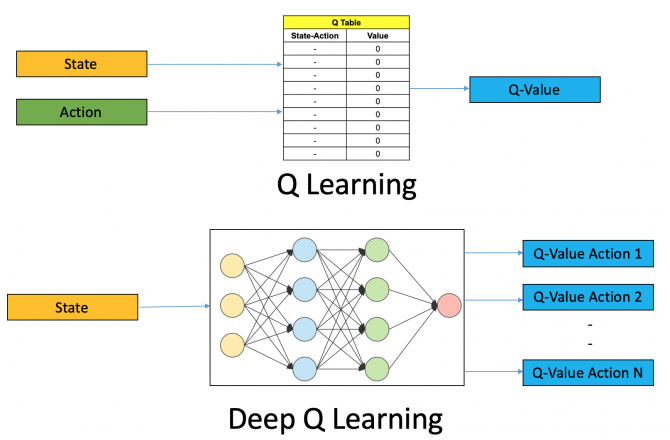

L'algorithme du DQN intègre plusieurs idées :
1. Implémentation d'un réseau de neurones pour estimer $Q$
2. Utilisation d'un "Replay buffer"
3. Utilisation d'un "target network" mis à jour plus lentement que le réseau $Q$ pour améliorer la stabilité.

## Rappel de l'algorithme complet

1. Initialize $Q(s,a)$ and ${Q}_{target}(s,a)$ networks with random weights and create a replay buffer
2. With probability $\epsilon$ select a random action $a$, otherwise select the action with best Q-value
3. Make action $a$ in the environment and observe the reward $r$ and next state $s'$
4. Store transition $(s,a,r,s')$ in the replay buffer
5. Sample a random mini-batch of transitions from the replay buffer
6. For every transition, calculate target $y=r$ if the episode has ended or $ y = r+\gamma Max {Q}_{target}(s,a)$ otherwise
7. Calculate loss: $L=(Q(s,a)-y)^2$
8. Update $Q(s,a)$ using the SGD algorithm
9. Every $N$ steps, copy weights from $Q$ to ${Q}_{target}$
10. Repeat from step 2 until converged

Plutôt que d'implémenter directement le tout, on va procéder par étape

### Imports python

In [1]:
#!/usr/bin/env python3
import argparse
import time
import numpy as np
import collections
import gym

#pytorch :
import torch
import torch.nn as nn
import torch.optim as optim

#plot
import matplotlib.pyplot as plt
# Pour utiliser les outils de visualisation des logs de tensorboard:
from torch.utils.tensorboard import SummaryWriter

In [2]:
%load_ext tensorboard  

### Premier agent qui interagit de manière aléatoire avec l'environnement, sans entrainement :

Le code ci-dessous illustre un agent pas vraiment intelligent qui choisit une action au hasard. On peut observer quelle récompense il obtient :

Episode fini après 1 timesteps
Historique des récompenses :
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0]


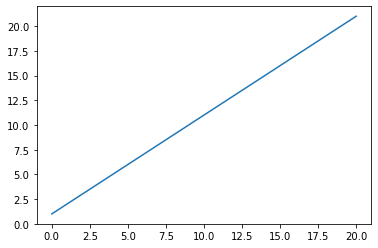

In [3]:
env = gym.make('CartPole-v1')
for episode in range(1):
  observation = env.reset()
  reward_sum = 0
  reward_sum_history = []
  for iteration in range(100):
    env.render()
    action = np.random.choice([0, 1])
    observation, reward, done, info = env.step(action)
    reward_sum += reward
    reward_sum_history.append(reward_sum)
    if done:
      print("Episode fini après {} timesteps".format(episode+1))
      break
  print(f"Historique des récompenses :\n{reward_sum_history}")
  plt.plot(reward_sum_history)
  plt.show()  
env.close()

### Implémentation d'un buffer d'expérience

Pour mettre en place le mécanismes d'experience replay, on implémente une classe permettant de gérer le buffer. Le code ci-dessous utilise un "deque" qui permet d'imposer une taille maximale, mais vous pourriez utiliser une autre structure de données

In [4]:
# On définit un tuple pour contenir des transitions
Transition = collections.namedtuple('Transition',
                                    field_names=['state', 'action', 'reward', 'done', 'new_state'])


class ExperienceBuffer:
    def __init__(self, capacity):
        self.buffer = collections.deque(maxlen=capacity)

    def __len__(self):
        return len(self.buffer)

    def append(self, transition):
        self.buffer.append(transition)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        states, actions, rewards, dones, next_states = \
            zip(*[self.buffer[idx] for idx in indices])
        return np.array(states), np.array(actions), \
               np.array(rewards, dtype=np.float32), \
               np.array(dones, dtype=np.uint8), \
               np.array(next_states)

### Définition du Réseau de neurones (Q network)

Nous allons utiliser des réseaux de neurones pour approximer l'espérance de récompense cumulée $Q(s, a)$. 
Ensuite nous appliquerons l'équation de Bellman pour évaluer l'erreur réalisée.
**Construisez un réseau de neurone qui vous semble adapté au problème en complétant ci-dessous en réfléchissant au nombre d'entrées et de sorties de votre problème**

In [5]:
class DQN(nn.Module):
    def __init__(self):
        super(DQN, self).__init__()

        # Définir ici votre réseau

    def forward(self, x):
        # Définir la fonction forward associée


SyntaxError: incomplete input (901887097.py, line 8)

###  Sélection d'action

Plutôt que de choisir des actions aléatoires nous nous pouvons utiliser cette approximation de $Q$ pour choisir les actions. A chaque nouvel état que reçoit votre agent, calculez
la Q-valeur des actions. Implémentez également une stratégie d'exploration $\epsilon$− greedy. Cette stratégie consiste à chosir avec une probabilité $\epsilon$, une action aléatoire, et avec une probabilité $(1 − \epsilon)$ la meilleure action. 

**Compléter la fonction `select_action` ci-dessous pour mettre en oeuvre cette stratégie**

In [ ]:
class Agent:
    def __init__(self, env, exp_buffer):
        self.env = env
        self.exp_buffer = exp_buffer
        self._reset()

    def _reset(self):
        self.state = env.reset()
        self.total_reward = 0.0

    @torch.no_grad()
    # Fonction de sélection d'action avec exploration "epsilon-greedy"
    def select_action(self, net, epsilon=0.0):
        #A COMPLETER !!
        
        return action   
    
    # Fonction qui réalise une étape d'interaction avec l'environnement :
    # sélection de l'action, exécution, récupération de la récompense et de l'état suivant,
    # et stockage dans le buffer
    def play_step(self, net, epsilon=0.0):
        done_reward = None

        # Select action
        action = # COMPLETER

        # Execute action and get reward and new state from the environment
        new_state, reward, is_done, _ = self.env.step(action)        
        
        self.total_reward += reward

        # Store transition in the buffer
        # COMPLETER

        # Update state
        self.state = new_state

        if is_done:
            done_reward = self.total_reward
            self._reset()
        return done_reward
   

## Entrainement de l'agent !

Pour l'instant, notre agent n'apprend pas. Après chaque interaction, choisissez aléatoirement dans votre buffer un minibatch de données, calculez les Q-valeurs en appliquant le réseau,  calculez la fonction de coût en utilisant l'équation de Bellman (cf l'étape 6 de l'algorithme) et rétropropagez l'erreur dans le réseau de neurones.


In [ ]:
env = gym.make('CartPole-v1')
buffer = ExperienceBuffer(10000)
agent = Agent(env, buffer)

network = 

#optimizer ?

#loss ?


In [ ]:
for i in range (1000)
    
    reward = agent.play_step(net, epsilon)
    agent.env.render()
    
    optimizer.zero_grad()
    batch = buffer.sample(BATCH_SIZE)
    loss = calc_loss(batch, network)
    loss.backward()
    optimizer.step()


In [ ]:
total_rewards_test = []
agent.env.reset()
for episode in range(10):
    print("----------",episode)
    while True:  
        reward = agent.play_step(net, 0)
        agent.env.render()
        if reward is not None:
            total_rewards_test.append(reward)            
            print("%d: episode, reward %.3f, " % (episode,  reward)
            break


A partir de là, il se peut que votre agent apprenne des comportements intéressants mais qu'ils soient très instables. C'est dû au fait que la fonction d’erreur n'est pas stationnaire, modifier $Q(s, a)$ modifie également $Q̂(s0 , a) ; une backpropagation du gradient peut alors augmenter l'erreur.

Nous allons utiliser un target network pour stabiliser l'apprentissage. Clonez
votre réseau de neurones et utilisez le duplicat par calculer la Q-valeur ciblée. Mettez à jour de manière graduelle le duplicat vers le réseau de neurone original.

Il y a deux manières possibles de mettre à jour le target network :
— Toutes les N étapes d'apprentissage (10000 par exemple), recopier entièrement le réseau
de neurone original dans le duplicat.
— Mettre à jour petit à petit le duplicat à chaque étape d'apprentissage : $\theta' = (1−\alpha) \theta'+\alpha\theta$
où $\theta'$ sont les poids du duplicat, $\theta$ les poids du réseau original, et $\alpha$ le pas de mise à jour. Souvent $\alpha = 0.005$ ou $\alpha = 0.01$.
Dorénavant, votre DQN est censé fonctionner et votre agent devrait réussir à manipuler le
CartPole !

In [ ]:
agent.env.close()